<a href="https://colab.research.google.com/github/shangzechen/AI-research/blob/main/Copy_of_Copy_of_2d_array_pytorch_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
number=10
train_data_length = 800

train_data1 = torch.zeros((train_data_length, 2))
train_data2 = torch.zeros((train_data_length, 2))
train_data3 = torch.zeros((train_data_length, 2))
train_data4 = torch.zeros((train_data_length, 2))
train_data5 = torch.zeros((train_data_length, 2))
train_data6 = torch.zeros((train_data_length, 2))
train_data7 = torch.zeros((train_data_length, 2))
train_data8 = torch.zeros((train_data_length, 2))
train_data9 = torch.zeros((train_data_length, 2))
train_data10 = torch.zeros((train_data_length, 2))

data=np.load('/content/dt_ts_arc_1c_40kHz_ld_14.npy')

data1=torch.FloatTensor(data[2,])
train_data1[:, 0] = torch.arange(1,801)
train_data1[:, 1] = data1

data2=torch.FloatTensor(data[5,])
train_data2[:, 0] = torch.arange(1,801)
train_data2[:, 1] = data2

data3=torch.FloatTensor(data[8,])
train_data3[:, 0] = torch.arange(1,801)
train_data3[:, 1] = data3

data4=torch.FloatTensor(data[9,])
train_data4[:, 0] = torch.arange(1,801)
train_data4[:, 1] = data4

data5=torch.FloatTensor(data[11,])
train_data5[:, 0] = torch.arange(1,801)
train_data5[:, 1] = data5

data6=torch.FloatTensor(data[17,])
train_data6[:, 0] = torch.arange(1,801)
train_data6[:, 1] = data6

data7=torch.FloatTensor(data[19,])
train_data7[:, 0] = torch.arange(1,801)
train_data7[:, 1] = data7

data8=torch.FloatTensor(data[20,])
train_data8[:, 0] = torch.arange(1,801)
train_data8[:, 1] = data8

data9=torch.FloatTensor(data[22,])
train_data9[:, 0] = torch.arange(1,801)
train_data9[:, 1] = data9

data10=torch.FloatTensor(data[33,])
train_data10[:, 0] = torch.arange(1,801)
train_data10[:, 1] = data10

train_data_total=torch.cat((train_data1,train_data2,train_data3,train_data4,train_data5,train_data6,train_data7,train_data8,train_data9,train_data10))
train_labels = torch.zeros(train_data_length*number)
train_set = (train_data_total) 



# 整理改进版本

## Import Library

In [19]:
import torch
from torch import nn
import numpy as np
import math
import matplotlib.pyplot as plt

torch.manual_seed(111)

## Import Dataset

In [24]:
train_data_length = 800
train_data = torch.zeros((train_data_length, 2))

data=np.load('/content/dt_ts_arc_1c_40kHz_ld_14.npy')
data=torch.FloatTensor(data[0,])

train_data[:, 0] = torch.arange(1,801)
train_data[:, 1] = data


train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

batch_size = 800
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)


## Implementing Discriminator

In [25]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

discriminator = Discriminator()

## Implementing Generator

In [26]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

## Define Training Loop

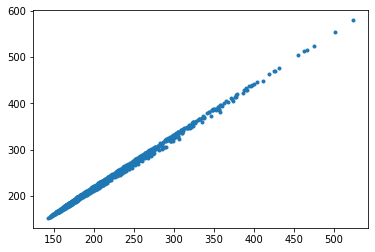

Epoch: 170 Loss D.: 0.033690739423036575
Epoch: 170 Loss G.: 8.957700729370117


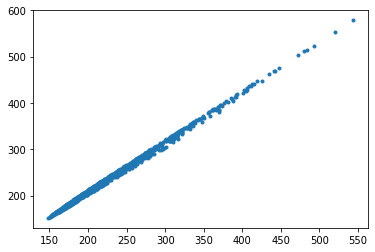

Epoch: 180 Loss D.: 0.027533704414963722
Epoch: 180 Loss G.: 10.891478538513184


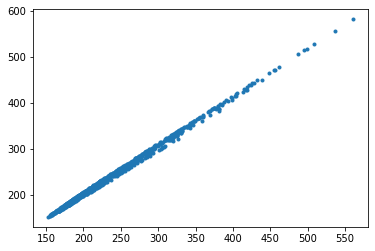

Epoch: 190 Loss D.: 0.02644290030002594
Epoch: 190 Loss G.: 10.54574203491211


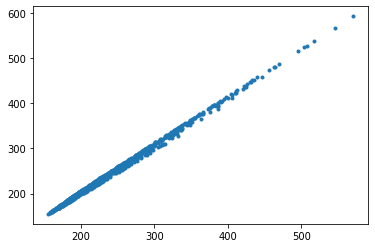

Epoch: 200 Loss D.: 0.03925837203860283
Epoch: 200 Loss G.: 9.835310935974121


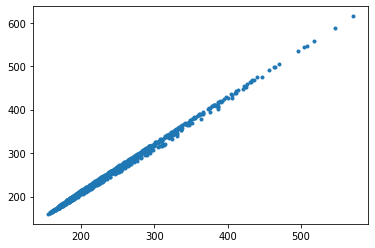

Epoch: 210 Loss D.: 0.04964867979288101
Epoch: 210 Loss G.: 8.405489921569824


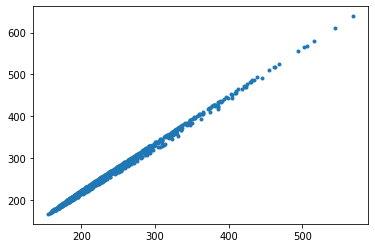

KeyboardInterrupt: ignored

In [28]:
lr = 0.001
num_epochs = 30000
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)
latent_space_samples1 = torch.randn(800, 2)
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 :
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            generated_samples1 = generator(latent_space_samples1)
            generated_samples1 = generated_samples1.detach()
            plt.plot(generated_samples1[:, 0], generated_samples1[:, 1], ".")
            plt.show()